### 3-1．데이터의 이해
#### 데이터 리드

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Pandas의 로드
import pandas as pd

# 파일을 리드
bank_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝 데이터 전처리 입문_로드북/chap3-4/data/bank.csv', sep=',')

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [5]:
# 연습문제1
# 마지막에서 10행전까지 표시
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [6]:
# 데이터의 행수, 열수를 확인
print(bank_df.shape)

(7234, 17)


In [ ]:
# 데이터 형을 확인
print(bank_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


### 결손값의 확인

In [9]:
# isnulㅣ을 사용해 bank_df에 결손값이 포함되어 잇는지 조사합니다. 결손값이 포함되어 있으면 True, 포함되어있지 않으면 false를 표시한다.


# 데이터행에 결손값이 포함되어 있는가?
print(bank_df.isnull().any(axis=1)) # any(axis=1) 행 
print("=" * 50) 
# 데이터열에 결손값이 포함되어 있는가?
print(bank_df.isnull().any(axis=0))  # any(axis=0) 열



0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [8]:
# 데이터행별 결손값의 갯수
print(bank_df.isnull().sum(axis=1))
print("=" * 50)
# 데이터열별 결손값의 갯수
print(bank_df.isnull().sum(axis=0))

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [12]:
# 연습문제2
# 데이터행별 결손값의 갯수
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False))

139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64


In [13]:
print(bank_df.isnull().sum(axis=0).sort_values(ascending=False))

poutcome     5900
contact      2038
education     273
job            44
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64


### 통계량의 계산

In [14]:
# 데이터형이 수치인 각종 통계량의 계산
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


중앙치와 최빈치는 데이터 세트에 포함되지 못한 특이값(이상치)의 영향을 받지 않는 성질이 있습니다.
일례로 일반적인 가정의 연소득을 파악할때, 특이값에 해당하는 고위 고득층과 저위 소득층의 연소득을 제외하기 위해서 중앙치를 참고하는 것입니다.

In [21]:
# 연습문제3
# 데이터형이 문자열인 각종 통계량의 계산
bank_df.describe(include=[object,int])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,7234.000000,7190,7234,6961,7234,7234.000000,7234,7234,5196,7234.000000,7234,7234.000000,7234.000000,7234.000000,7234.000000,1334,7234
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,1560,4343,3745,7101,NaN,4058,6066,4697,NaN,2202,NaN,NaN,NaN,NaN,772,6381
mean,40.834808,NaN,NaN,NaN,NaN,1374.912911,NaN,NaN,NaN,15.623860,NaN,262.875311,2.713989,40.277716,0.565939,NaN,NaN
std,10.706442,NaN,NaN,NaN,NaN,3033.882933,NaN,NaN,NaN,8.307826,NaN,268.921065,2.983740,99.188008,1.825100,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,453.500000,NaN,NaN,NaN,16.000000,NaN,183.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1470.750000,NaN,NaN,NaN,21.000000,NaN,321.750000,3.000000,-1.000000,0.000000,NaN,NaN


### 데이터의 가시화１

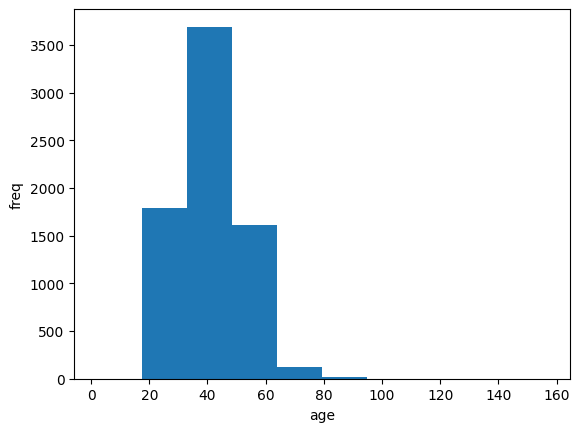

In [22]:
# Matplotlib의 로드
import matplotlib.pyplot as plt
%matplotlib inline

# age의 히스토그램을 작성
plt.hist(bank_df['age'])
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age') # 글자 크기 설정?
plt.ylabel('freq') # 글자 크기 설정?
plt.show()

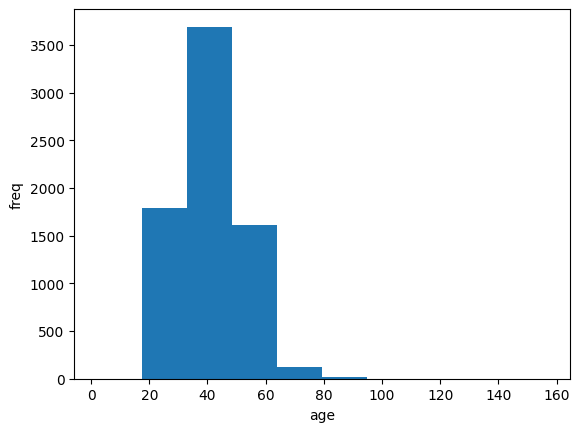

In [56]:
# 연습문제4
# balance의 히스토그램
plt.hist(bank_df['age'])
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

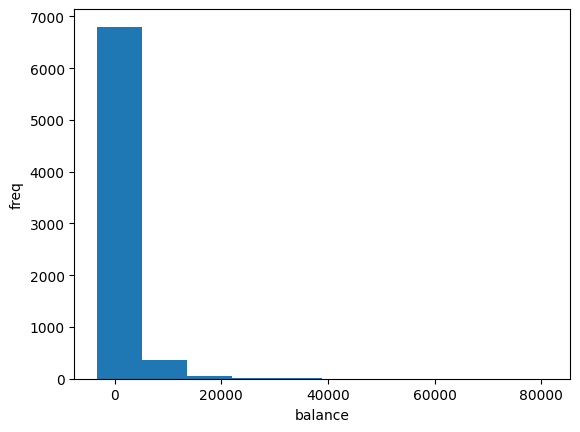

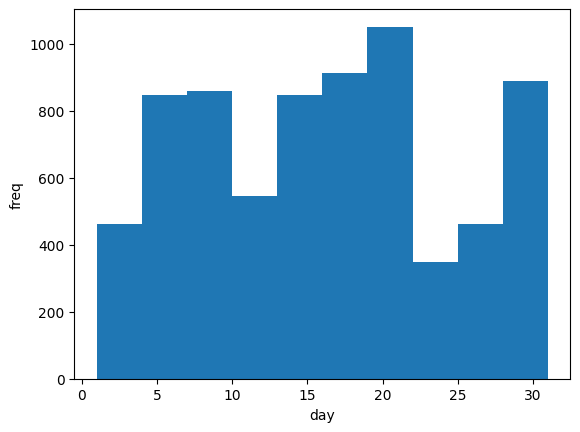

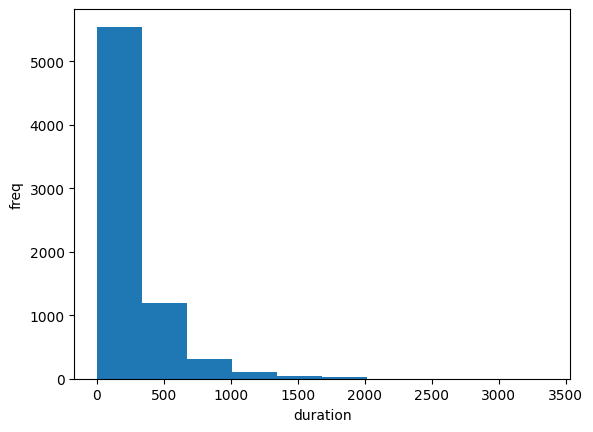

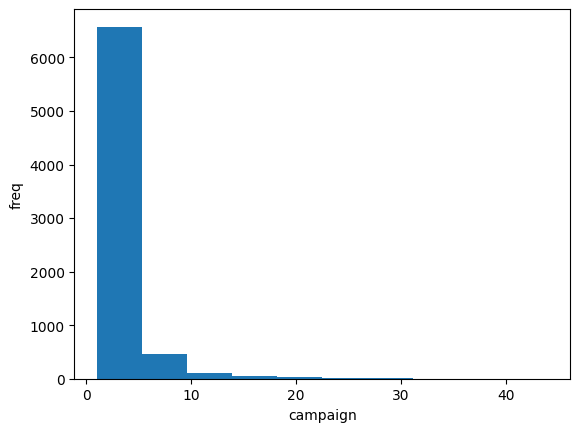

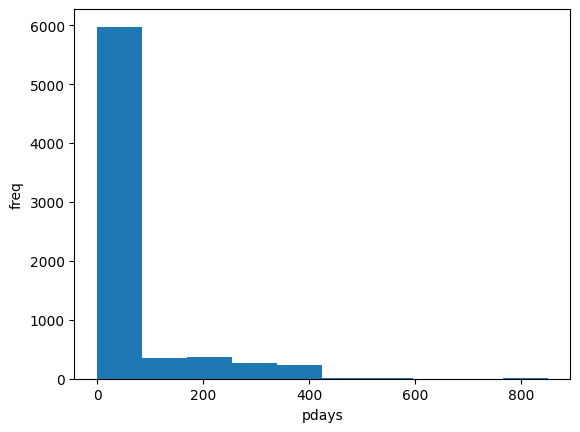

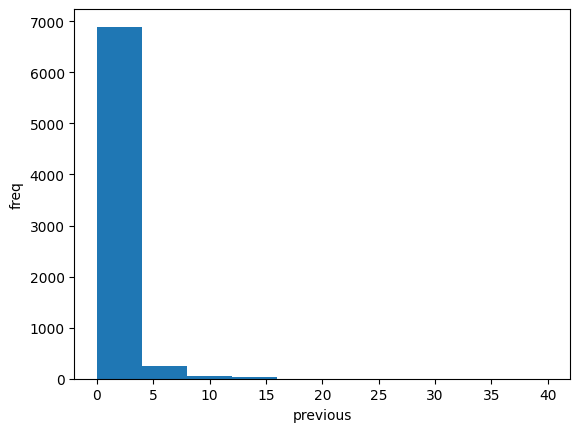

In [54]:
columns = ["balance", "day", "duration", "campaign", "pdays", "previous"]

for column in columns:
    plt.hist(bank_df[column])
    plt.xlabel(column)
    plt.ylabel('freq')
    plt.show()



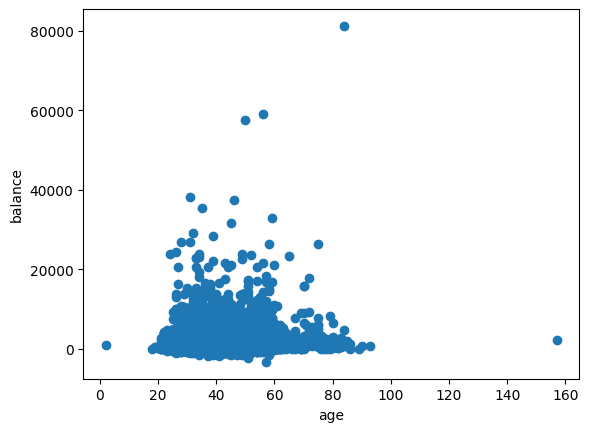

              age   balance
age      1.000000  0.112364
balance  0.112364  1.000000


In [24]:
# age와 balance의 산포도를 작성
plt.scatter(bank_df['age'], bank_df['balance'])
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

# age와 balance의 상관계수
print(bank_df[['age', 'balance']].corr())

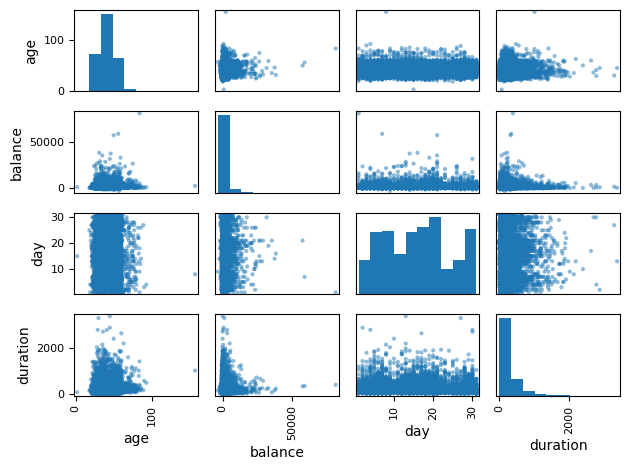

In [25]:
# 연습문제5
# 산포도행렬의 작성
pd.plotting.scatter_matrix(bank_df[['age','balance','day','duration']])
plt.tight_layout()
plt.show()

변수간 상관계수와 공선성도 고려해야 한다.

공선성은 변수 상호간에 강하게 상관해 발생하는 문제입니다.

공선성잉 일으키는 문제에는 모델작성에 관련된 계산량의 증대, 모델의 성능 저하, 모델의 불안정화 등이 있다. 이와같은 문제를 방지하려면 준비 단계에서 상관이 강한 변수를 제외하면 됩니다.

상관관계 인과관계도 잘따져야 한다. 

In [60]:
# job값의 비율을 계산
print(bank_df['job'].value_counts(ascending=False, normalize=True))  # normalize는 발생횟수가 1이 되도록 정규화한다.

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


In [74]:
for i in bank_df.columns.tolist():
    print("titie:", i)
    print("\n")
    print(bank_df[i].value_counts(ascending=False, normalize=True), "\n")

titie: age


32     0.048383
34     0.047000
35     0.042991
33     0.042991
31     0.042300
         ...   
18     0.000138
85     0.000138
157    0.000138
2      0.000138
89     0.000138
Name: age, Length: 73, dtype: float64 

titie: job


management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64 

titie: marital


married     0.600359
single      0.284766
divorced    0.114874
Name: marital, dtype: float64 

titie: education


secondary    0.537997
tertiary     0.312886
primary      0.149117
Name: education, dtype: float64 

titie: default


no     0.981615
yes    0.018385
Name: default, dtype: float64 

titie: balance


 0       0.077827
 1       0.004285
 4       0.003871
 2       0.003041
 3       0.002626
           ...   
-163   

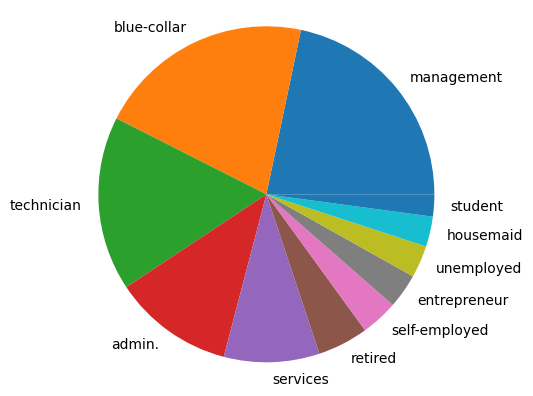

In [90]:
# job값의 레이블
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index # job 열의 데이터를 발생횟수를 판다스_시리즈로 뽑고 해당 데이터의 숫자를 판다스_인덱스로 뽑음.
# job의 값
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values # job 열의 데이터를 발생횟수를 판다스_시리즈로 뽑고 데이터 값들을 넘파이_어레이로 만듬.

# job의 원그래프를 작성
plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

In [102]:
job_label = bank_df['job'].value_counts(ascending=False, normalize=True)
type(job_label)

pandas.core.series.Series

In [94]:
type(job_vals)

numpy.ndarray

32     0.048383
34     0.047000
35     0.042991
33     0.042991
31     0.042300
         ...   
18     0.000138
85     0.000138
157    0.000138
2      0.000138
89     0.000138
Name: age, Length: 73, dtype: float64


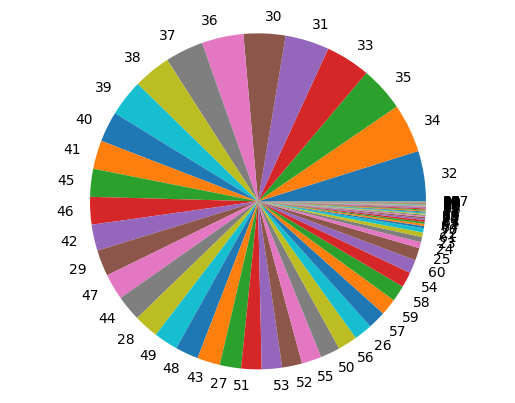



management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


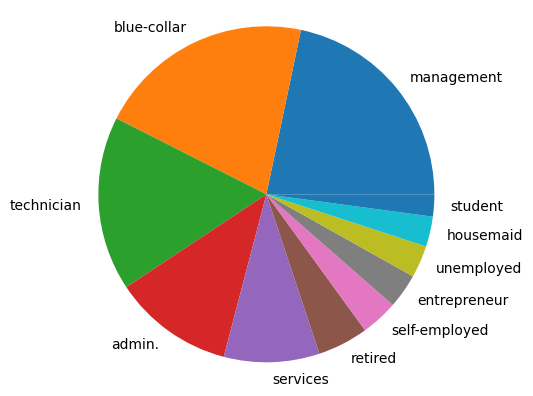



married     0.600359
single      0.284766
divorced    0.114874
Name: marital, dtype: float64


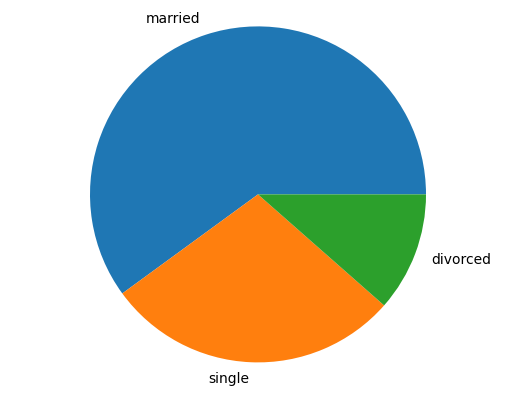



secondary    0.537997
tertiary     0.312886
primary      0.149117
Name: education, dtype: float64


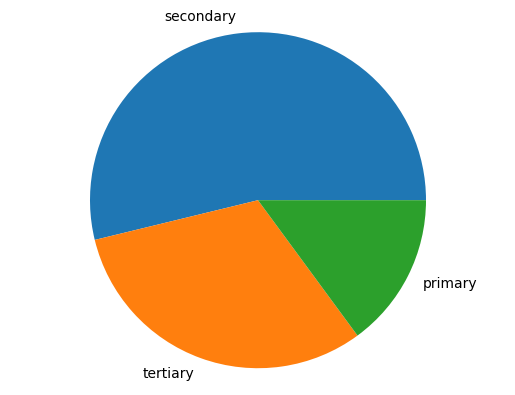



no     0.981615
yes    0.018385
Name: default, dtype: float64


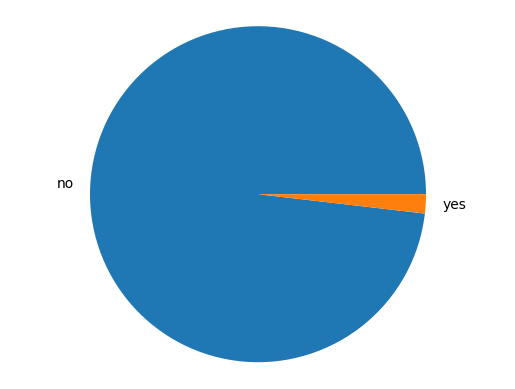



 0       0.077827
 1       0.004285
 4       0.003871
 2       0.003041
 3       0.002626
           ...   
-163     0.000138
 5450    0.000138
 3067    0.000138
 6419    0.000138
 1428    0.000138
Name: balance, Length: 3102, dtype: float64


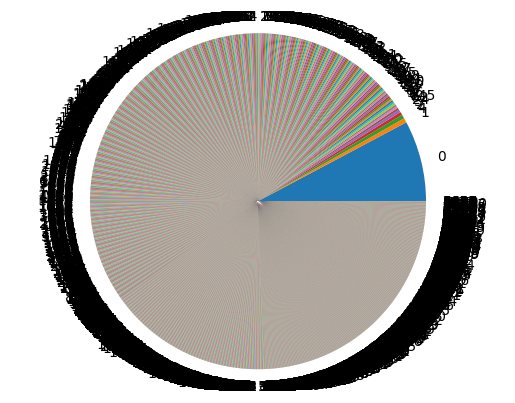



yes    0.560962
no     0.439038
Name: housing, dtype: float64


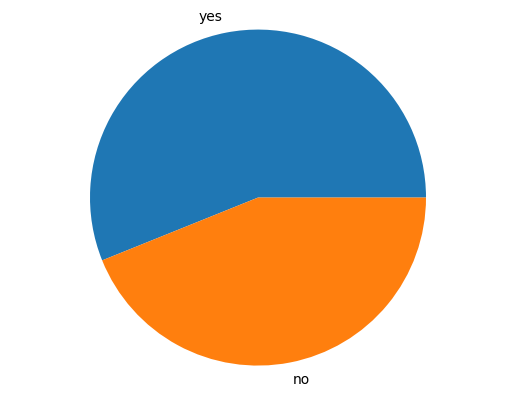



no     0.83854
yes    0.16146
Name: loan, dtype: float64


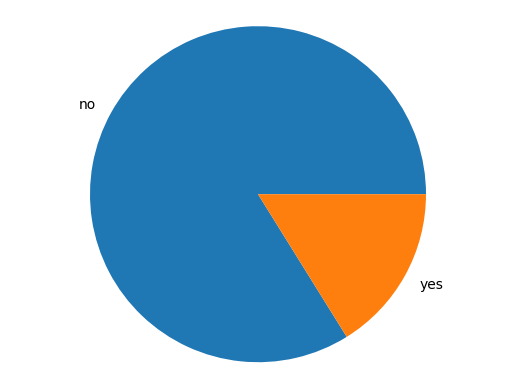



cellular     0.903965
telephone    0.096035
Name: contact, dtype: float64


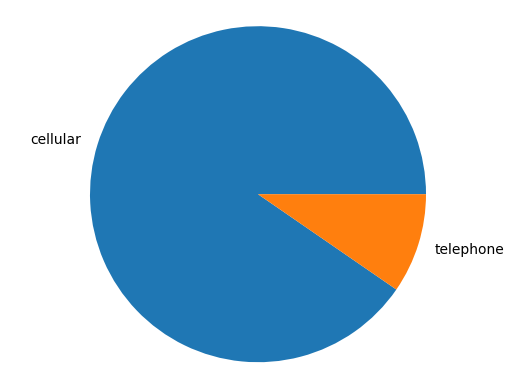



20    0.061515
18    0.051700
21    0.045203
6     0.044788
8     0.044374
17    0.043130
7     0.042991
15    0.041056
28    0.040503
5     0.039950
19    0.038706
14    0.038153
13    0.038153
29    0.035527
30    0.033591
4     0.032485
11    0.032071
12    0.031933
16    0.031518
9     0.031518
2     0.030550
3     0.025850
27    0.024468
26    0.021427
23    0.020597
22    0.018938
25    0.018109
31    0.013547
10    0.011612
24    0.008571
1     0.007465
Name: day, dtype: float64


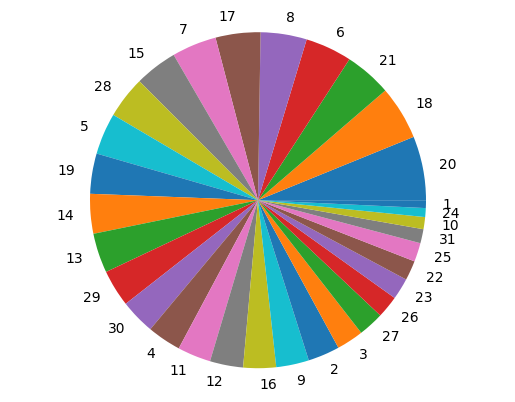



may    0.304396
jul    0.159110
aug    0.131877
jun    0.112801
nov    0.091098
feb    0.065662
apr    0.062206
jan    0.027924
oct    0.018247
sep    0.013132
mar    0.009677
dec    0.003871
Name: month, dtype: float64


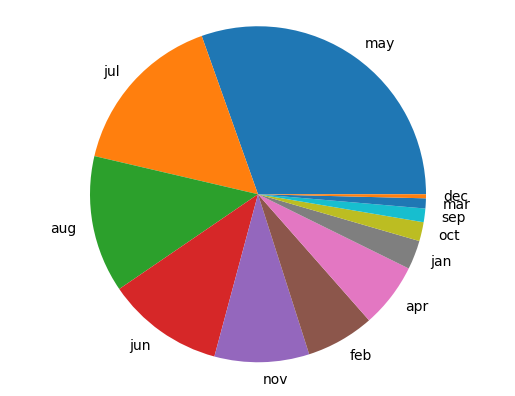



112     0.004976
114     0.004838
89      0.004838
133     0.004838
90      0.004838
          ...   
1871    0.000138
1083    0.000138
1314    0.000138
920     0.000138
845     0.000138
Name: duration, Length: 1002, dtype: float64


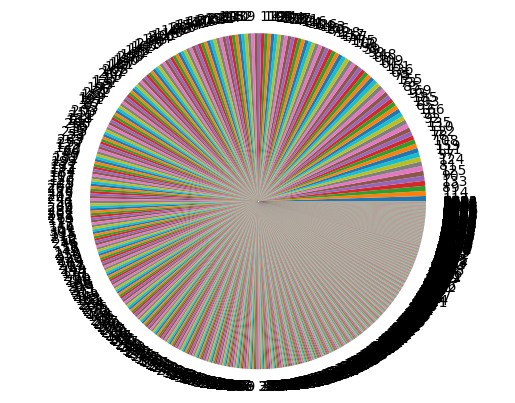



1     0.390655
2     0.275919
3     0.125104
4     0.078795
5     0.038153
6     0.028753
7     0.015482
8     0.011750
9     0.006635
11    0.004562
10    0.004009
12    0.003456
15    0.001935
14    0.001659
18    0.001659
13    0.001659
17    0.001521
19    0.001244
16    0.001106
20    0.000968
22    0.000829
21    0.000691
25    0.000553
23    0.000415
29    0.000415
30    0.000276
28    0.000276
32    0.000276
24    0.000276
44    0.000138
38    0.000138
27    0.000138
33    0.000138
41    0.000138
37    0.000138
26    0.000138
Name: campaign, dtype: float64


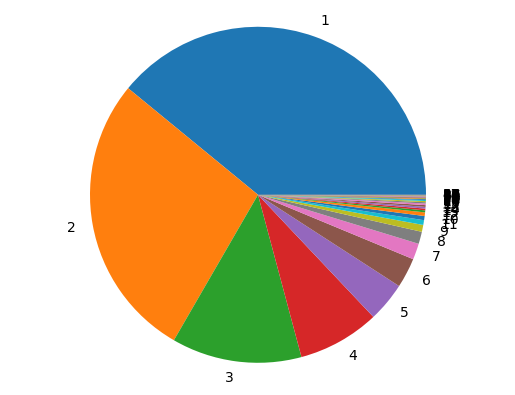



-1      0.815178
 181    0.004285
 183    0.004009
 182    0.004009
 92     0.003732
          ...   
 72     0.000138
 67     0.000138
 226    0.000138
 223    0.000138
 33     0.000138
Name: pdays, Length: 337, dtype: float64


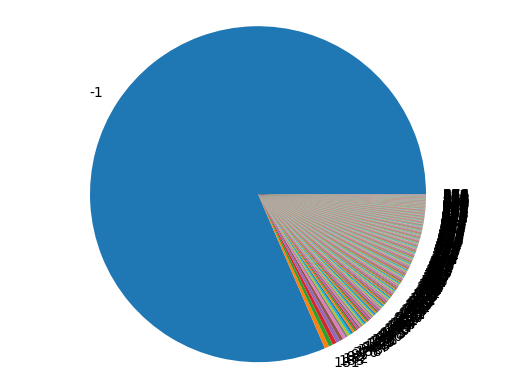



0     0.815178
1     0.061792
2     0.047553
3     0.028338
4     0.014791
5     0.009538
6     0.006359
7     0.004424
9     0.002212
8     0.002212
11    0.001659
12    0.001382
10    0.000968
13    0.000968
14    0.000829
17    0.000276
16    0.000276
22    0.000276
37    0.000138
27    0.000138
15    0.000138
23    0.000138
30    0.000138
20    0.000138
40    0.000138
Name: previous, dtype: float64


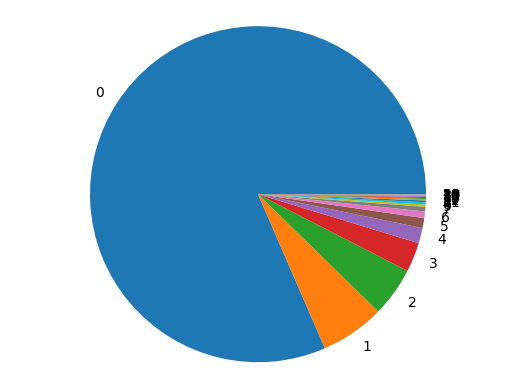



failure    0.578711
other      0.230885
success    0.190405
Name: poutcome, dtype: float64


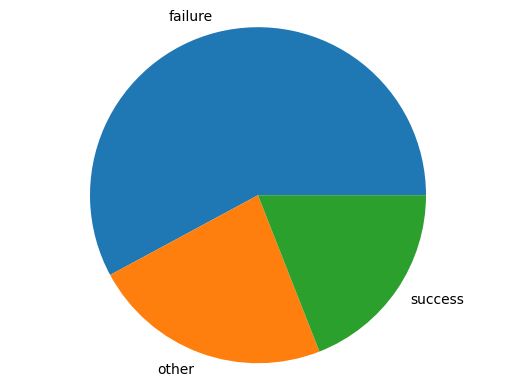



no     0.882085
yes    0.117915
Name: y, dtype: float64


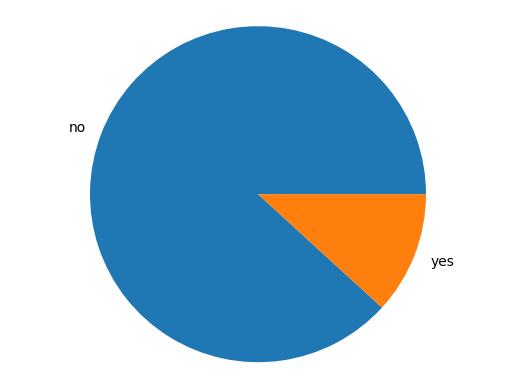

In [114]:

for i in bank_df.columns:
#연습문제6
    # marital값의 비율을 계산
    print(bank_df[i].value_counts(ascending=False, normalize=True))  # 이게 판다스 시리즈 이다. 꼭 기억해라
####################### 구분 ###########################################################################################
    # 열값의 레이블
    columns_label = bank_df[i].value_counts(ascending=False, normalize=True).index
    # 열의 값
    columns_vals = bank_df[i].value_counts(ascending=False, normalize=True).values

    # marital의 원 그래프를 작성 
    plt.pie(columns_vals, labels=columns_label)  # 그림이다.
    plt.axis('equal')
    plt.show()  
    print("\n")

In [109]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

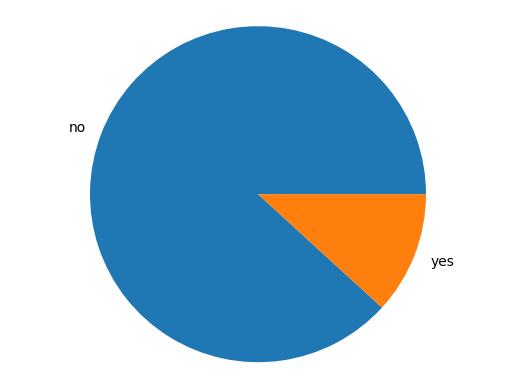

In [115]:
# y값의 레이블
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
# y의 값
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

# y의 원 그래프를 작성
plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

# 목적변수 이다. 모델작성에 사용하는 데이터는 균형잡힌 데이터가 이상적이다. 만약 불균형한 데이터를 그대로 사용하면 다수 클래스밖에 검출되지 않는 모델이 만들어진다. 

### 데이터의 가시화2

목적변수 y에 대한 데이터 분포를 확인하겠습니다. 먼저 나이를 대상으로 상자수염 그림을 작성한다.

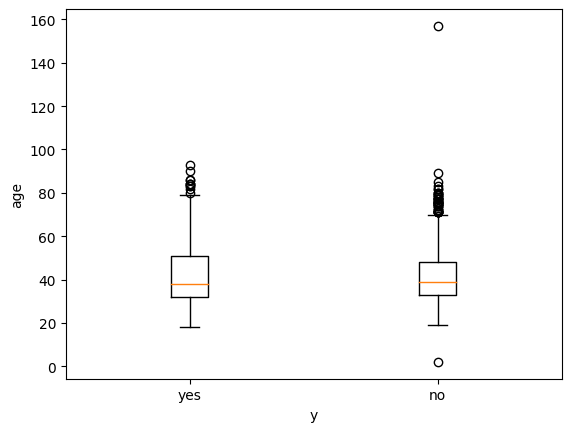

In [135]:
# y가 yes나 no일때의 age데이터를 추출
y_yes = bank_df[bank_df['y'] == 'yes']  # 데이터 프레임  # bank_df['y'] == 'yes' 이거는 판다스 시리즈이다.
y_no = bank_df[bank_df['y'] == 'no']   # 데이터 프레임   # bank_df['y'] == 'no' 이거는 판다스 시리즈 이다.

# yes와 no의 데이터를 정리
y_age = [y_yes['age'], y_no['age']]  # 리스트[판다스 시리즈, 판다스 시리즈]

# 박스수염 플롯의 작성
plt.boxplot(y_age)  # 분산상태확인 하기에 좋다. 
 
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca() # 이거는 plt.xlabel('y')와  plt.ylabel('age') 두개를 실행시켜주는 객체다. 

# y축 （종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()

# no의 데이터는 특이값을 포함하고 있다. 예금 신청의 대상 고객으로 존재 할수 없는 나이이다. 이와 같은 데이터는 나중에 제외해야한다.

In [134]:
ax

<Axes: xlabel='y', ylabel='age'>

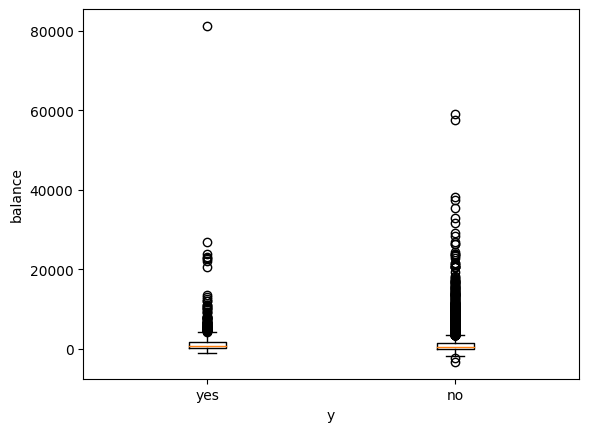

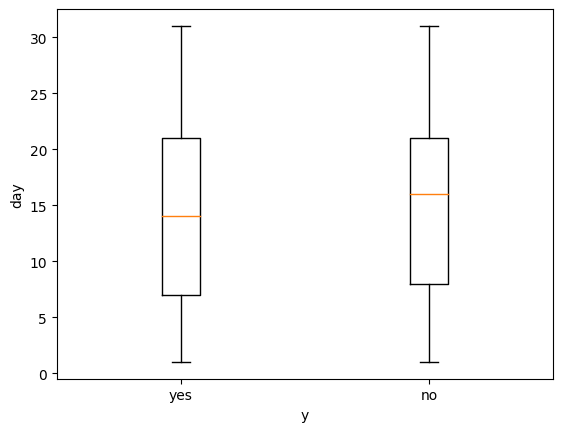

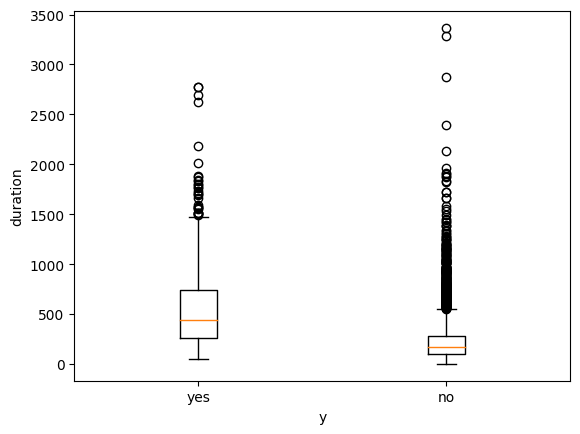

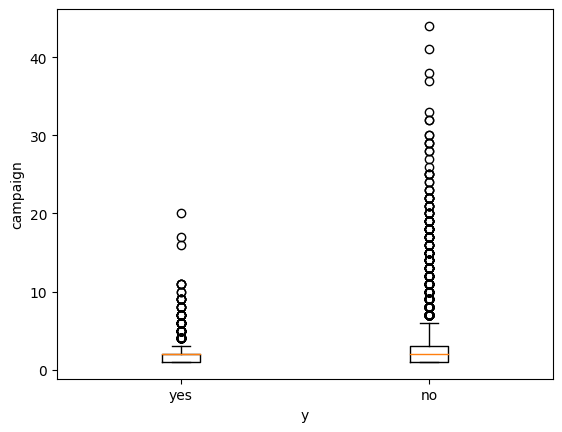

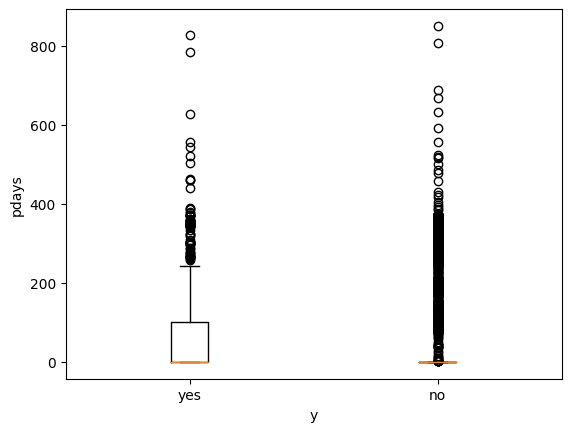

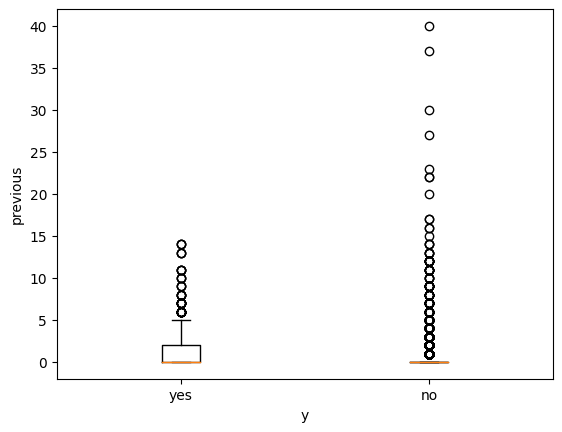

In [143]:

columns = ["balance", "day", "duration", "campaign", "pdays", "previous"]

y_yes = bank_df[bank_df['y'] == 'yes'] 
y_no = bank_df[bank_df['y'] == 'no'] 

for i in columns:
# 연습문제7
    # yes와 no의 데이터를 정리
    y_columns = [y_yes[i], y_no[i]]

    # 박스수염 플롯의 작성
    plt.boxplot(y_columns)
    # x축(횡축)과 y축（종축）의 레이블을 추가
    plt.xlabel('y')
    plt.ylabel(i)
    ax = plt.gca()
    # y축（종축）의 레이블을 추가
    plt.setp(ax, xticklabels = ['yes','no'])
    plt.show()

In [147]:
bank_df[["day", "balance"]]

,day,balance
0,5,2143
1,5,265
2,5,-7
3,5,-3
4,5,-103
...,...,...
7229,16,199
7230,16,159
7231,16,138
7232,16,1428


In [148]:
y_yes[["day", "balance"]]

,day,balance
9,5,45
10,5,1270
18,5,184
34,5,0
67,6,387
...,...,...
7218,25,1495
7225,9,464
7228,11,2543
7230,16,159
